<a href="https://colab.research.google.com/github/ranjithsrajan/PyLab/blob/main/M3_MP4_NB_HeartDisease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Mini Project 04 : HeartDisease_Classification

### Dataset Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Attribute Information:

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
#@title Download dataset
!gdown "1d38QsG8ZkYBBZKllqkBknUxC4xZiGob7"

Downloading...
From: https://drive.google.com/uc?id=1d38QsG8ZkYBBZKllqkBknUxC4xZiGob7
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 67.5MB/s]


### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
# read the data
# YOUR CODE HERE
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/heart.csv')

In [32]:
# Print the top 5 data points
# YOUR CODE HERE
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Exploration (2 Marks)

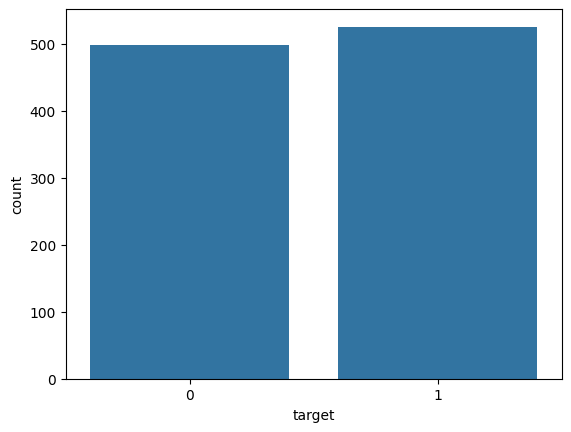

In [33]:
# Create a countplot using Seaborn's countplot function to visualize the distribution of the 'target' variable in the DataFrame
# YOUR CODE HERE
import seaborn as sns
sns.countplot(x='target', data=df)
plt.show()

Analyze and report the percentage of patients with and without heart disease based on a given dataset. Calculate the percentage of patients who haven't heart disease and the percentage of patients who have heart disease in the dataset.

In [39]:
# Analyze and report the percentage of patients with and without heart disease based on a given dataset.
# Calculate the percentage of patients who haven't heart disease and the percentage of patients who have heart disease in the dataset.
# YOUR CODE HERE

df['target'] = df['target'].map({0:'No Disease',1:'Have Disease'})
df['target'].value_counts(normalize=True) * 100


,proportion
target,
Have Disease,51.317073
No Disease,48.682927


In [28]:
#YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       0 non-null      object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


Count the percentage of Male and Female patients

In [38]:
# YOUR CODE HERE : Count the percentage of Male and Female patients
df['sex'] = df['sex'].map({0:'Female',1:'Male'})
df['sex'].value_counts(normalize=True) * 100

,proportion
sex,
Male,69.560976
Female,30.439024


In [10]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


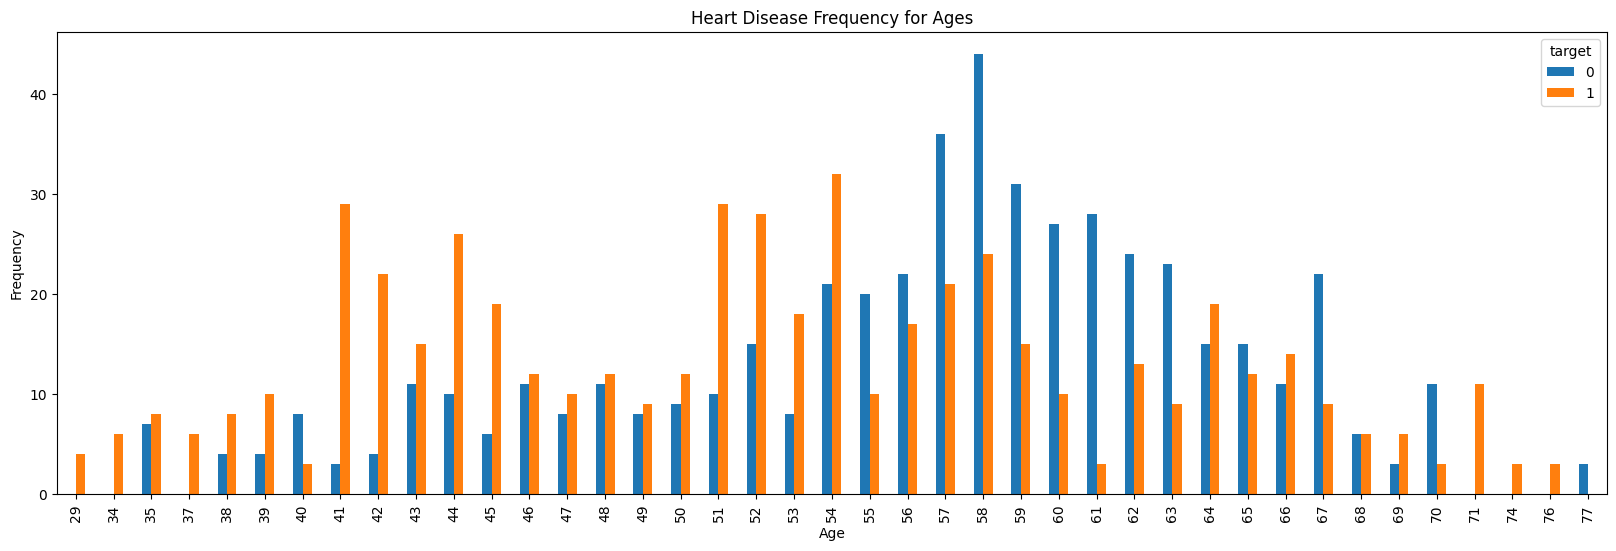

In [11]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

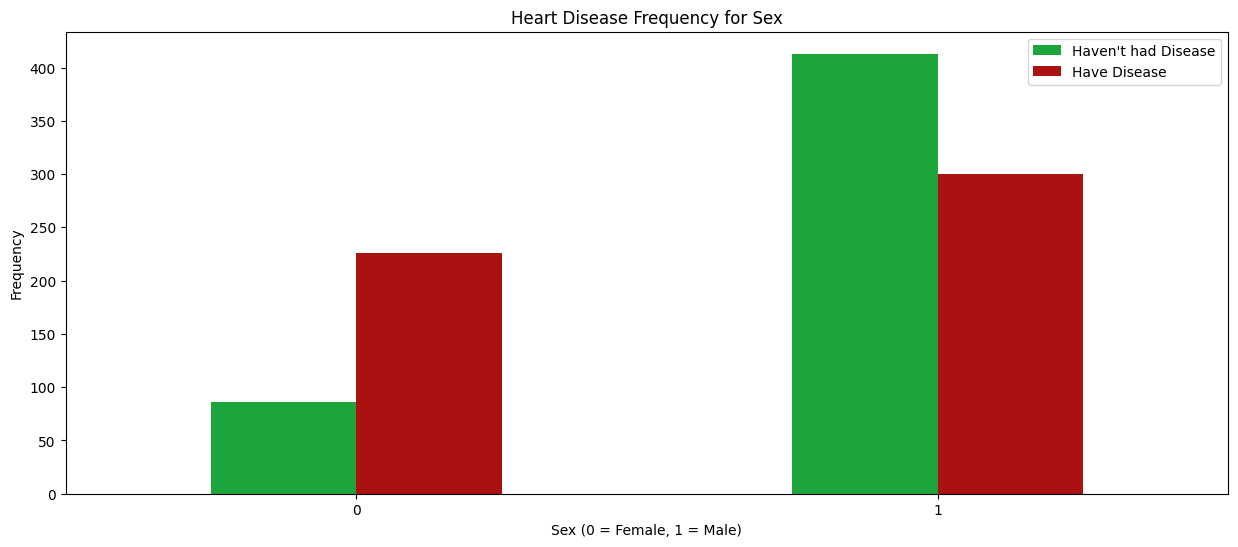

In [13]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't had Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

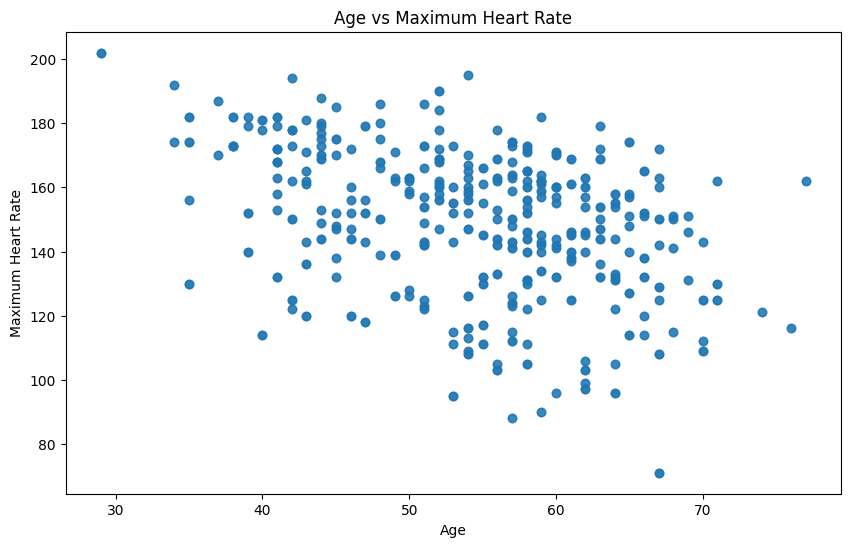

In [15]:
# YOUR CODE HERE : Create a scatter plot to visualize the relationship between a patient's age and their maximum heart rate based on a given dataset.
plt.figure(figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Age vs Maximum Heart Rate')
plt.scatter(df['age'], df['thalach'], alpha=0.5)


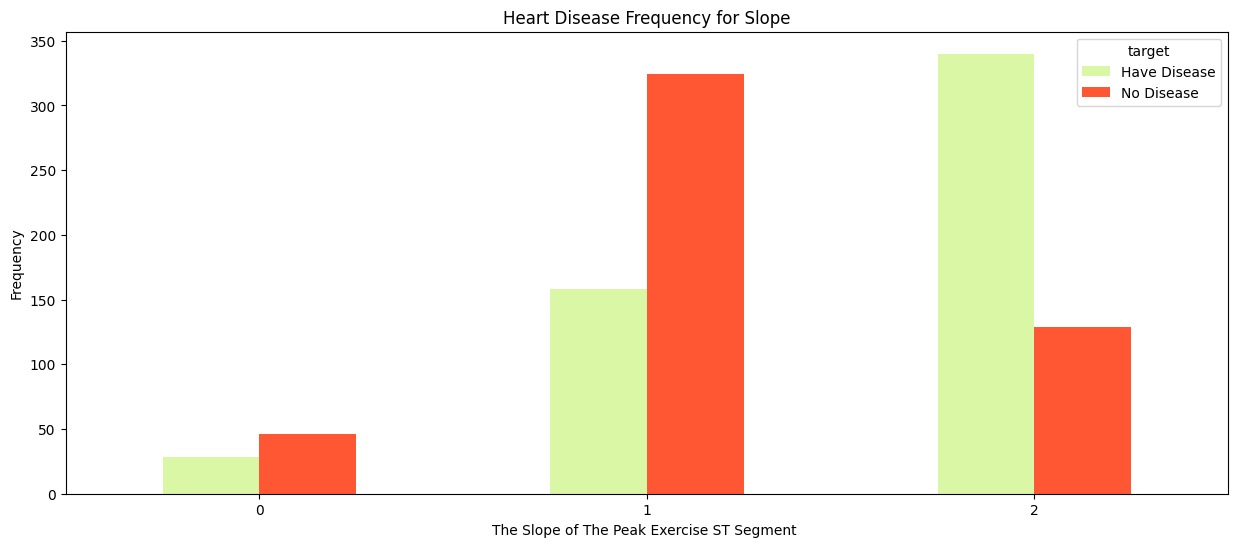

In [40]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

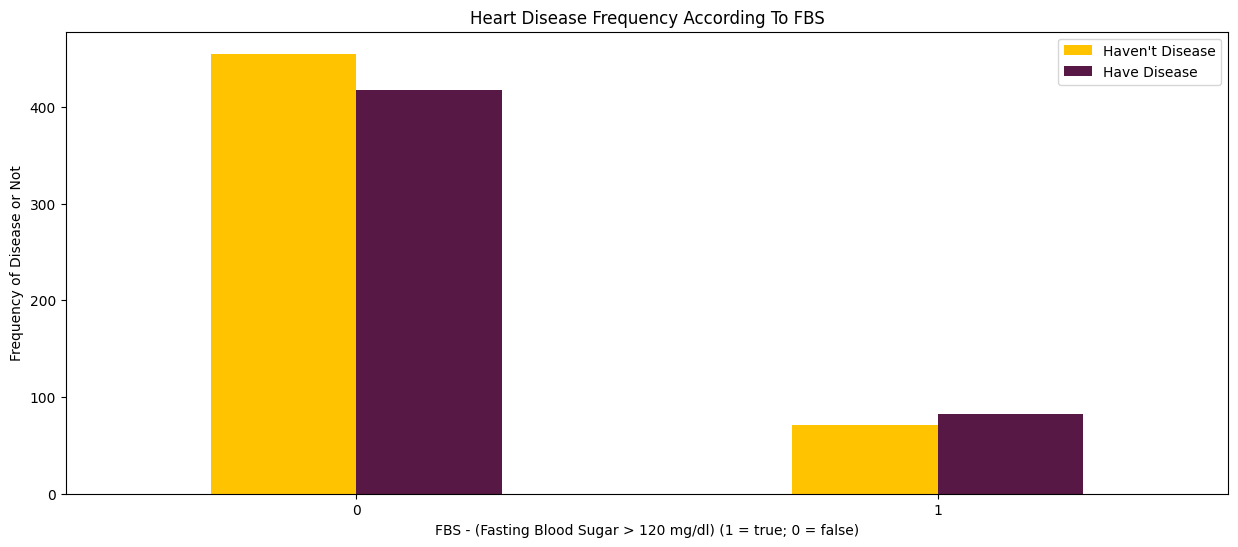

In [41]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()


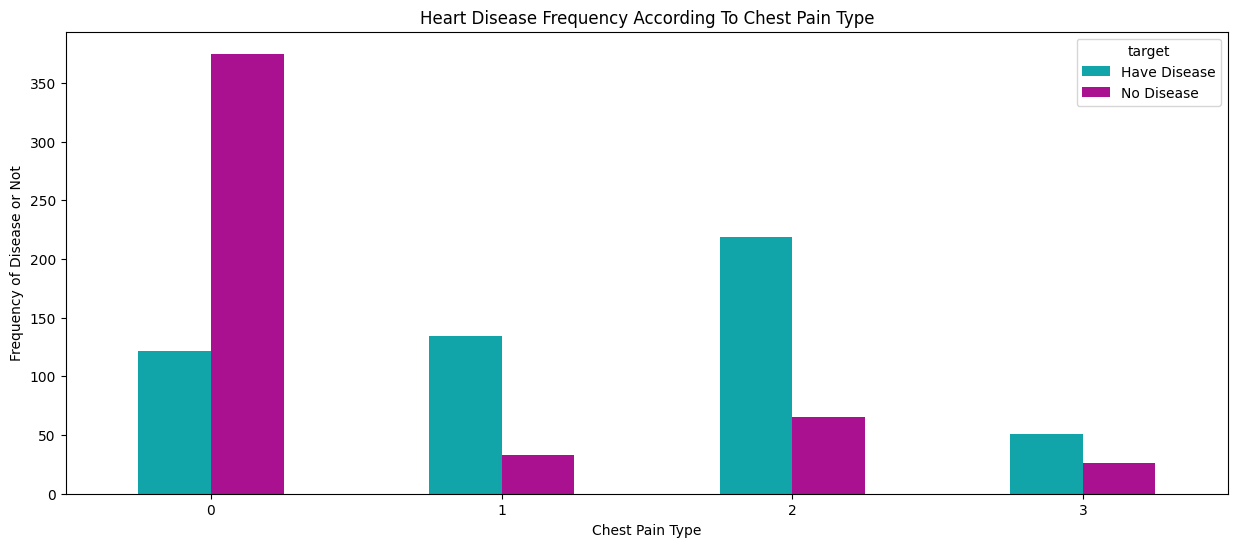

In [42]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Creating Dummy Variables

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [43]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [44]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,No Disease,True,False,False,False,False,False,False,True,False,False,True
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,No Disease,True,False,False,False,False,False,False,True,True,False,False
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,No Disease,True,False,False,False,False,False,False,True,True,False,False
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,No Disease,True,False,False,False,False,False,False,True,False,False,True
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,No Disease,True,False,False,False,False,False,True,False,False,True,False


In [45]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,Male,125,212,0,1,168,0,1.0,2,No Disease,True,False,False,False,False,False,False,True,False,False,True
1,53,Male,140,203,1,0,155,1,3.1,0,No Disease,True,False,False,False,False,False,False,True,True,False,False
2,70,Male,145,174,0,1,125,1,2.6,0,No Disease,True,False,False,False,False,False,False,True,True,False,False
3,61,Male,148,203,0,1,161,0,0.0,1,No Disease,True,False,False,False,False,False,False,True,False,False,True
4,62,Female,138,294,1,1,106,0,1.9,3,No Disease,True,False,False,False,False,False,True,False,False,True,False


### Creating Model


In [46]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

### Normalize Data ( 1 Mark)

In [51]:
# YOUR CODE HERE: Normalize the data
from sklearn.preprocessing import StandardScaler

# Convert 'sex' column back to numerical values
x_data['sex'] = x_data['sex'].map({'Female': 0, 'Male': 1})

scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)
x_data = pd.DataFrame(x_data_scaled, columns=x_data.columns)

In [53]:
# YOUR CODE HERE : Train test split
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)

### Logistic Regression (1 Mark)

In [54]:
# YOUr CODE HERE : Perform binary classification using Logistic Regression and calculate the accuracy of the model on a test dataset.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

Logistic Regression Accuracy: 0.8048780487804879


### K-Nearest Neighbour (KNN) Classification ( 1 Mark)

In [ ]:
# YOUR CODE HERE : Perform binary classification using the k-Nearest Neighbors (KNN) algorithm and calculate the accuracy of the model on a test dataset.

In [ ]:
# YOUR CODE HERE :  Find the Best k-value

### Support Vector Machine (SVM) Algorithm ( 1 Mark)

In [ ]:
# YOUR CODE HERE : Perform binary classification using the Support Vector Machine (SVM) algorithm and calculate the accuracy of the SVM model on a test dataset.

### Naive Bayes Algorithm ( 1 Mark)

In [ ]:
# YOUR CODE HERE : Perform binary classification using the Naive Bayes algorithm and calculate the accuracy of the model on a test dataset.

### Decision Tree ( 1 Mark)

In [ ]:
# YOUR CODe HERE : Perform binary classification using the Decision Tree algorithm and calculate the accuracy of the model on a test dataset.

### Random Forest Classification ( 1 Mark)

In [ ]:
# YOUR CODE HERE : Perform binary classification using the Random Forest algorithm and calculate the accuracy of the model on a test dataset.

### Comparing Models

In [ ]:
 # Your Code Here : Visualize and compare the accuracy of different machine learning algorithms using a bar chart.

### Confusion Matrix ( 1 Mark)

Calculate confusion matrices for the predictions made by different machine learning algorithms and stores them in separate variables.

In [ ]:
# YOUR CODE HERE : Calculate confusion matrices for the predictions made by different machine learning algorithms and stores them in separate variables